# Classifying sentence if they are related to Drug or not


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
!pip install wget


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
import wget 
helper_functions = wget.download(url)

In [5]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [6]:
df = pd.read_csv('drug.csv' )

In [7]:
df.head(25)

,Label,Post
0,Normal,i dont think im getting my baby them white 9 h...
1,Normal,we cannot continue calling ourselves feminists...
2,Normal,nawt yall niggers ignoring me
3,Hatespeech,<user> i am bit confused coz chinese ppl can n...
4,Hatespeech,this bitch in whataburger eating a burger with...
5,Attack,laura loomer raped me while screaming at me in...
6,Hatespeech,and this is why i end up with nigger trainee d...
7,Offensive,nogs jews and dykes how enriching
8,Hatespeech,guilty until proven innocent unless you are a ...
9,Hatespeech,tired i can not support abortion from a moral ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125 entries, 0 to 20124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   20125 non-null  object
 1   Post    20125 non-null  object
dtypes: object(2)
memory usage: 314.6+ KB


In [9]:
df.Label.unique()

array(['Normal', 'Hatespeech', 'Attack', 'Offensive', 'Drug'],
      dtype=object)

<AxesSubplot:>

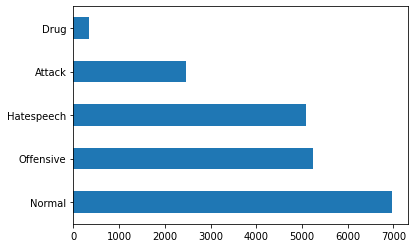

In [10]:
m = df.Label.value_counts()
m.plot(kind = 'barh')

In [11]:
import plotly.express as px
df_result = pd.DataFrame(m)
df_result = df_result.reset_index()  
df_result.columns = ['Label', 'No of Data Points']
fig = px.pie(df_result,values='No of Data Points',names='Label', title='Dataset Distribution')
fig.show()

In [12]:
from sklearn.model_selection import train_test_split as tts 

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = tts(df["Post"].to_numpy(),
                                                                df["Label"].to_numpy(),
                                                                test_size=0.1,
                                                                random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(18112, 18112, 2013, 2013)

In [14]:
train_labels[:5] ,val_labels[:5] ,

(array(['Hatespeech', 'Normal', 'Attack', 'Offensive', 'Offensive'],
       dtype=object),
 array(['Hatespeech', 'Attack', 'Normal', 'Normal', 'Normal'], dtype=object))

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
val_labels = le.transform(val_labels)

In [16]:
train_labels[:5] , val_labels[:5]

(array([2, 3, 0, 4, 4]), array([2, 0, 3, 3, 3]))

## Multinomial NaiveBayes Model 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

Model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("Bayes_Classifier", MultinomialNB()) # model the text
])

In [18]:
Model_0

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [19]:
Model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [20]:
# Train  Set 
Model_0_score = Model_0.score(train_sentences, train_labels)
print(f"Naive Bayes model achieves an accuracy of: {Model_0_score*100:.2f}%")

Naive Bayes model achieves an accuracy of: 63.16%


In [21]:
# Test Set
Model_0_score = Model_0.score(val_sentences, val_labels)
print(f"Naive Bayes model achieves an accuracy of: {Model_0_score*100:.2f}%")

Naive Bayes model achieves an accuracy of: 45.65%


<AxesSubplot:>

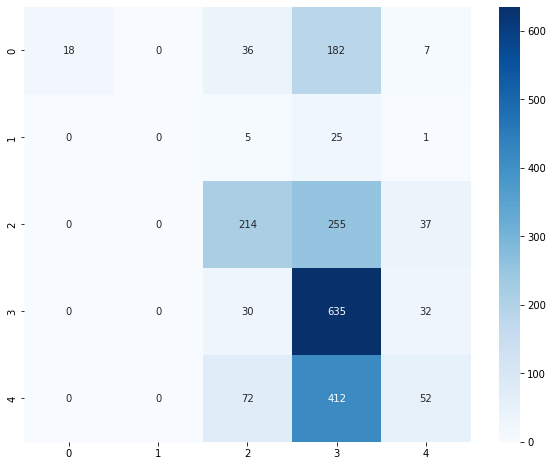

In [22]:
y_pred = Model_0.predict(val_sentences)
from sklearn.metrics import confusion_matrix as cm 
cmatrx =cm(val_labels , y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cmatrx,annot=True,fmt='d',cmap='Blues')